# Training Model on entire Training Dataset

I will now train the model on the entire training dataset to maximise the data the model can learn on before predicting the values of the kaggle test set.

In [1]:
import numpy as np
import pandas as pd

import os

from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from IPython import display #to display kaggle submission proof

In [2]:
df = pd.read_csv('../data/outputs/final_df.csv',index_col = 0)
test_set = pd.read_csv('../data/inputs/test.csv')

/var/folders/46/7m_77fzd11d4p2vjr6j6rtk40000gn/T/ipykernel_38347/3033088186.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  test_set = pd.read_csv('../data/inputs/test.csv')


Reading test set from kaggle for predictions.

## Final Ridge Regression Model Fitting

In [3]:
X = df.drop(['resale_price','id'],axis = 1)
y = df['resale_price']

In [4]:
imp_median = SimpleImputer(strategy='median')

X['Mall_Nearest_Distance_Imputed'] = imp_median.fit_transform(X['Mall_Nearest_Distance'].values.reshape(-1,1))

X = X.drop('Mall_Nearest_Distance',axis = 1)


In [5]:
X_objs = X.select_dtypes(include= 'object')
X_nums = X.select_dtypes(exclude = 'object')

In [6]:
ohe = OneHotEncoder(drop='first',sparse_output=False)

ohe_X_objs = pd.DataFrame(ohe.fit_transform(X_objs))
ohe_X_objs.columns = ohe.get_feature_names_out(input_features=X_objs.columns)


In [7]:
scaler = StandardScaler()

scaled_X_nums = scaler.fit_transform(X_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1))
scaled_X_nums = pd.DataFrame(scaled_X_nums,columns=X_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1).columns)
scaled_X_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']] = X_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']].reset_index(drop=True)


In [8]:
final_X = pd.concat([ohe_X_objs,scaled_X_nums],axis=1)

In [9]:
r_alphas = np.logspace(0, 5, 100) # setting up my alphas to pass into the model
ridge_model = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)
ridge_model.fit(final_X,y)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

# Kaggle Submission

In [10]:
extra_col = set(test_set.columns) - set(df.columns)
extra_col

{'Tranc_YearMonth',
 'address',
 'block',
 'bus_stop_name',
 'floor_area_sqft',
 'full_flat_type',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'hdb_age',
 'mid_storey',
 'planning_area',
 'postal',
 'pri_sch_name',
 'residential',
 'sec_sch_name',
 'street_name'}

The extra columns in the test set which I have to remove before passing into my model.

In [11]:
for column in extra_col:
    test_set = test_set.drop(column,axis=1)

In [12]:
kaggle_set = test_set.drop('id',axis = 1)

In [13]:
kaggle_set['Mall_Nearest_Distance_Imputed'] = imp_median.transform(kaggle_set['Mall_Nearest_Distance'].values.reshape(-1,1))

kaggle_set = kaggle_set.drop('Mall_Nearest_Distance',axis = 1)

In [14]:
kaggle_set = kaggle_set.fillna(0)

In [15]:
kaggle_set_objs = kaggle_set.select_dtypes(include= 'object')
kaggle_set_nums = kaggle_set.select_dtypes(exclude = 'object')

In [16]:
ohe_kaggle_set_objs = pd.DataFrame(ohe.transform(kaggle_set_objs))
ohe_kaggle_set_objs.columns = ohe.get_feature_names_out(input_features=kaggle_set_objs.columns)

In [17]:
scaled_kaggle_set_nums = scaler.transform(kaggle_set_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1))
scaled_kaggle_set_nums = pd.DataFrame(scaled_kaggle_set_nums,columns=kaggle_set_nums.drop(['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange'],axis = 1).columns)
scaled_kaggle_set_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']] = kaggle_set_nums[['affiliation','pri_sch_affiliation','bus_interchange','mrt_interchange']].reset_index(drop=True)


Doing the usual scaling, encoding, imputing.

In [18]:
final_kaggle_set = pd.concat([ohe_kaggle_set_objs,scaled_kaggle_set_nums],axis=1)
final_kaggle_set

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,sec_sch_latitude,sec_sch_longitude,Mall_Nearest_Distance_Imputed,affiliation,pri_sch_affiliation,bus_interchange,mrt_interchange
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.085109,-1.139600,0.392474,1.649075,-0.128778,0.580638,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.930290,0.746892,-0.557031,-0.721366,-1.889616,-0.353131,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174907,-0.658314,1.741771,0.193813,0.166468,0.416448,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.900486,-0.242922,-1.106745,1.718282,-0.892763,1.655569,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.350644,-0.942318,0.642344,-0.413969,-1.355736,1.106898,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055886,-0.608252,-1.106745,0.288208,0.034006,1.241697,0,0,1,0
16733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.912483,-0.273523,-0.806901,0.848382,0.960766,-0.393896,0,0,1,1
16734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.268127,0.167816,0.092630,0.790075,-1.284653,0.059880,0,0,0,0
16735,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.212327,-0.596905,1.092109,-0.372690,0.214130,0.497478,0,1,1,1


Test set ready to be passed into the model

In [19]:
kaggle_pred = pd.DataFrame(ridge_model.predict(final_kaggle_set))
kaggle_pred

,0
0,366611.795313
1,495468.273677
2,363369.725314
3,280492.312256
4,431152.844444
...,...
16732,358920.241949
16733,516963.247309
16734,393855.644562
16735,466594.772111


Predictions from test set

In [21]:
submission_model = pd.DataFrame(test_set['id']).merge(kaggle_pred,left_index = True,right_index = True)
submission_model.columns = ['Id','Predicted']
submission_model

,Id,Predicted
0,114982,366611.795313
1,95653,495468.273677
2,40303,363369.725314
3,109506,280492.312256
4,100149,431152.844444
...,...,...
16732,23347,358920.241949
16733,54003,516963.247309
16734,128921,393855.644562
16735,69352,466594.772111


DataFrame ready to be converted into csv file for Kaggle submission

In [22]:
os.makedirs('../data/outputs', exist_ok=True)  
submission_model.to_csv('../data/outputs/submission_model.csv',index=False)

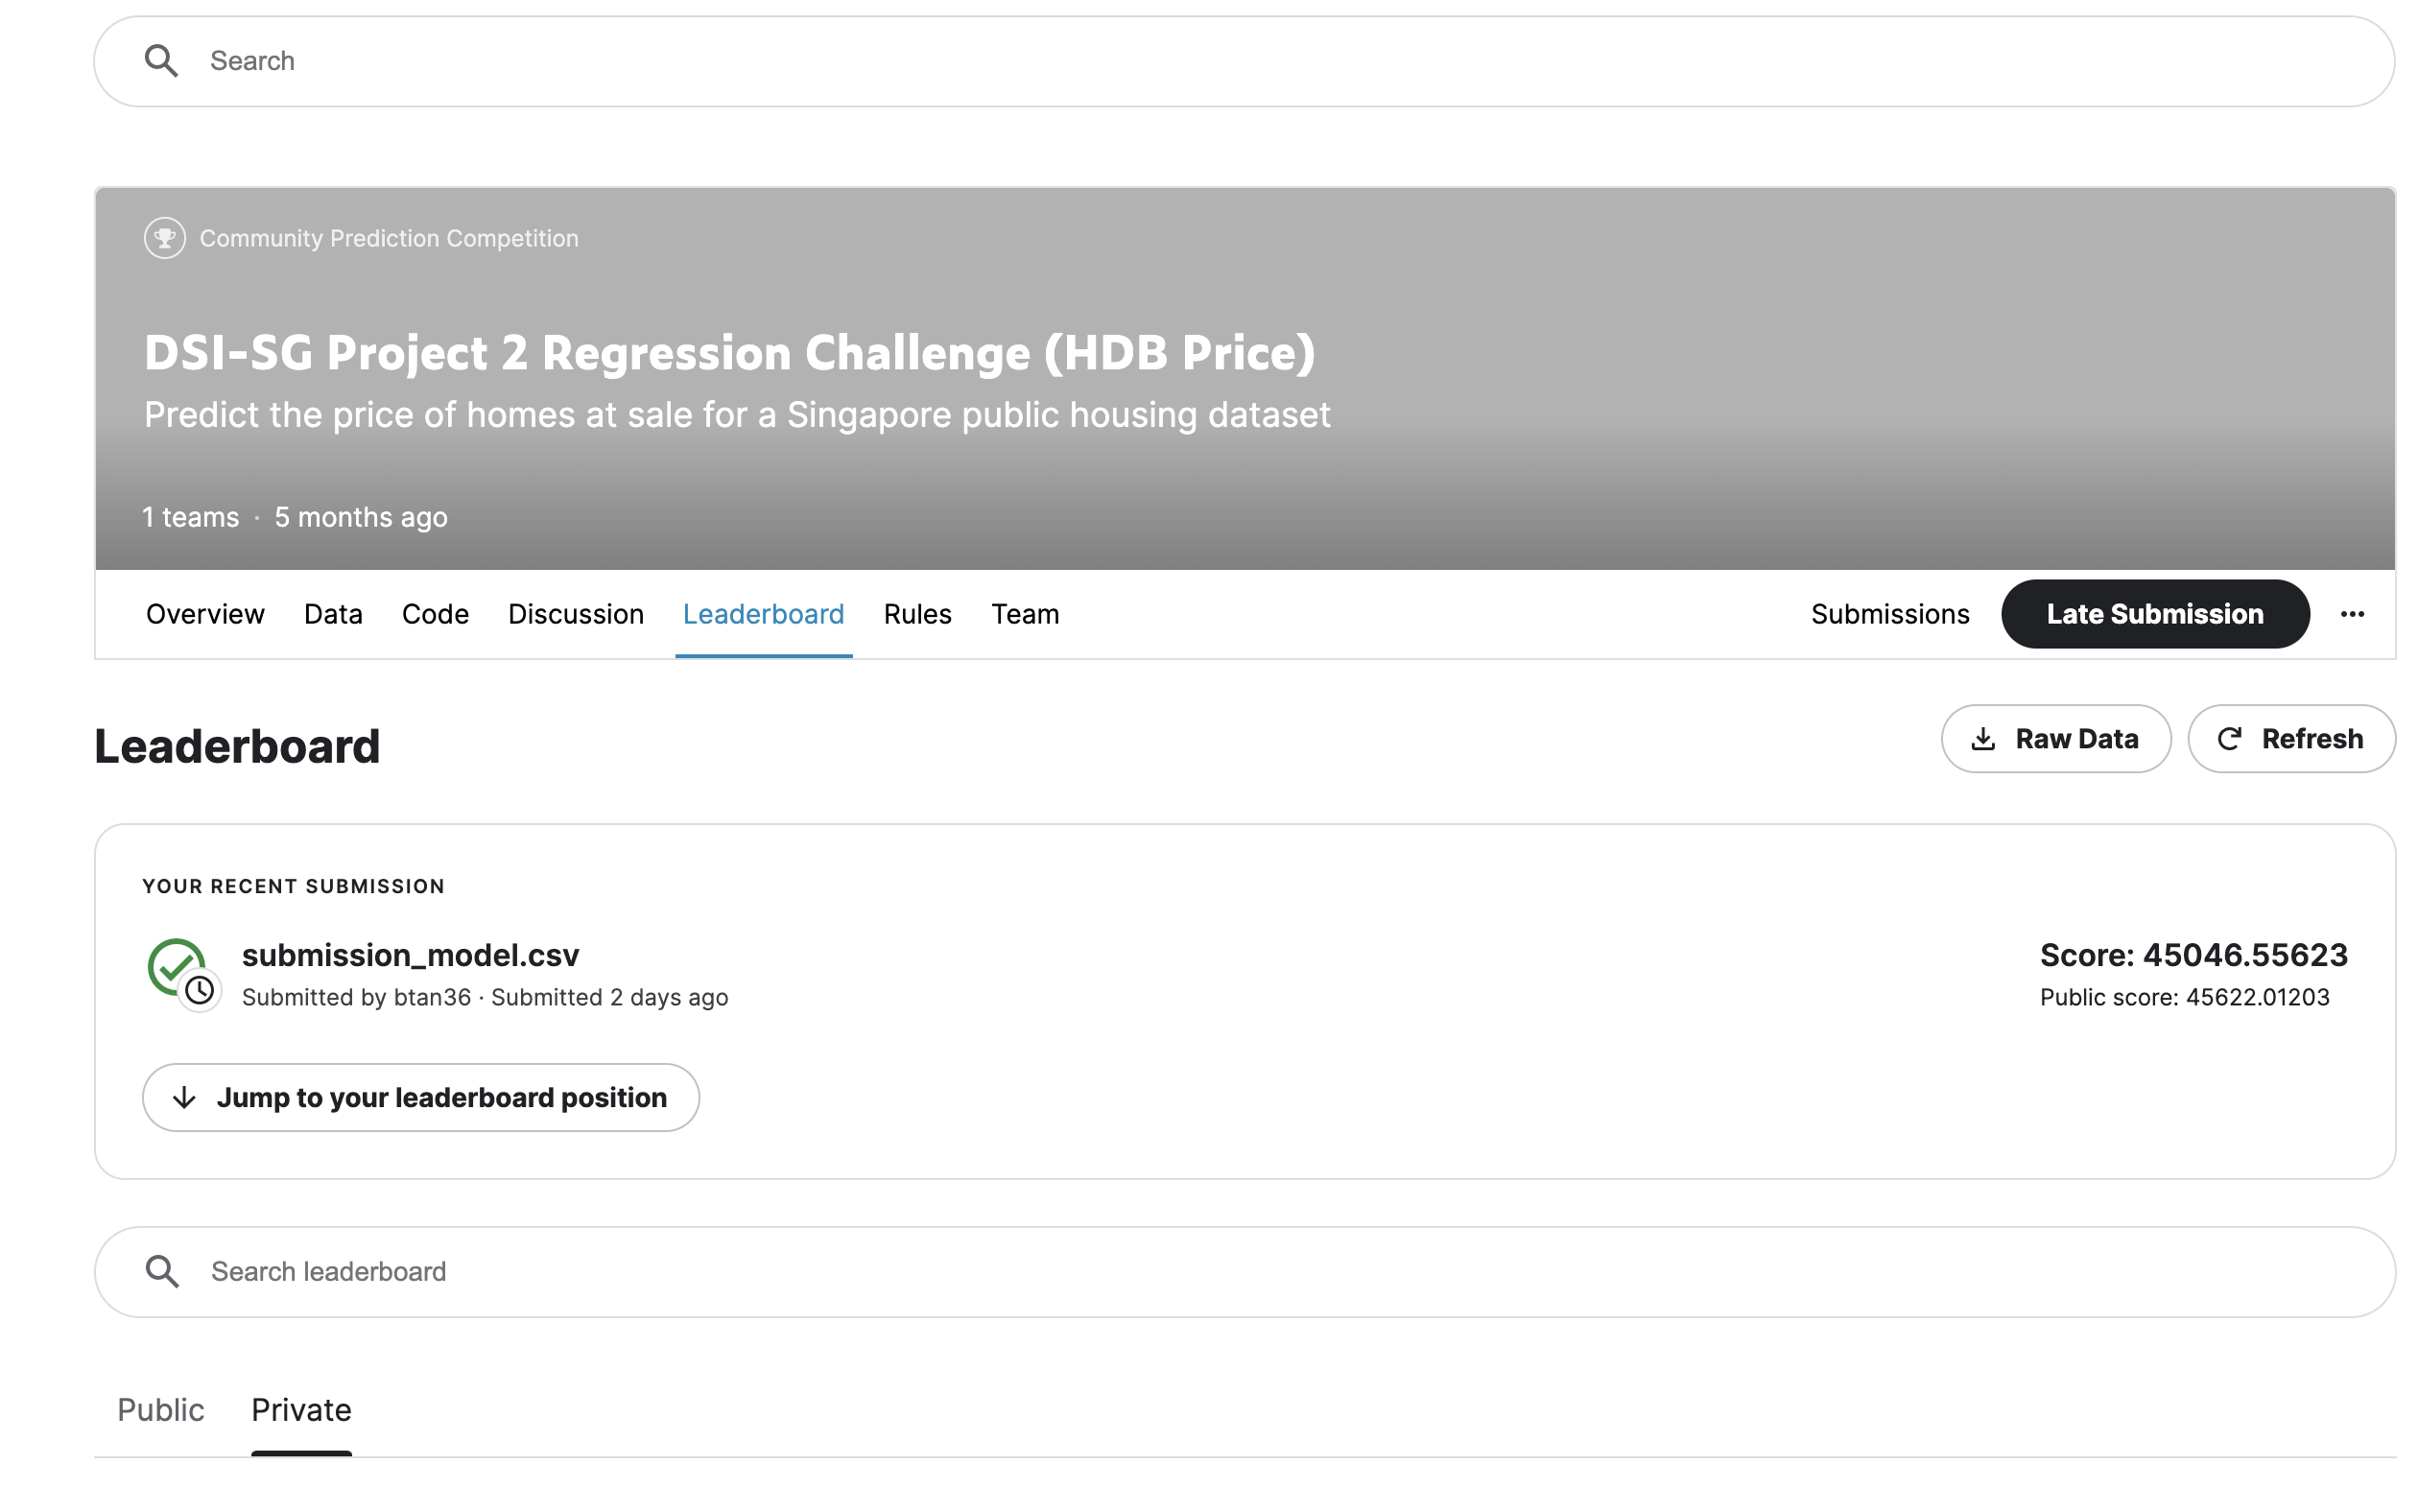

In [23]:
display.Image('../kaggle_submission_proof.png')

Proof of submission to kaggle.